# The Density Peak Advanced clustering algorithm

----------------
Load the package:

In [1]:
import io
import sys
import pandas as pd
import numpy as np
from Pipeline import DPA
import time

%load_ext autoreload
%autoreload 2

Read input csv file:

In [3]:
data_F1 = pd.read_csv("src/Pipeline/tests/benchmarks/Fig1.dat", sep=" ", header=None)

How to run Density Peak Advanced clustering:

    The default pipeline makes use of the PAk density estimator and of the TWO-NN intristic dimension estimator.
    The densities and the corresponding errors can also be provided as precomputed arrays.

    Parameters
    ----------

    Z : float, default = 1
        The number of standard deviations, which fixes the level of statistical confidence at which
        one decides to consider a cluster meaningful.

    metric : string, or callable
        The distance metric to use.
        If metric is a string, it must be one of the options allowed by
        scipy.spatial.distance.pdist for its metric parameter, or a metric listed in
        pairwise.PAIRWISE_DISTANCE_FUNCTIONS. If metric is "precomputed", X is assumed to
        be a distance matrix. Alternatively, if metric is a callable function, it is
        called on each pair of instances (rows) and the resulting value recorded. The
        callable should take two arrays from X as input and return a value indicating
        the distance between them. Default is 'euclidean'.
        
    densities : array [n_samples], default = None
        The logarithm of the density at each point. If provided, the following parameters are ignored:
        density_algo, k_max, D_thr.

    err_densities : array [n_samples], default = None
        The uncertainty in the density estimation, obtained by computing
        the inverse of the Fisher information matrix.
    
    k_hat : array [n_samples], default = None
        The optimal number of neighbors for which the condition of constant density holds.
        
    nn_distances  : array [n_samples, k_max+1]
        Distances to the k_max neighbors of each points.

    nn_indices : array [n_samples, k_max+1]
        Indices of the k_max neighbors of each points.

    affinity : string or callable, default 'precomputed'
        How to construct the affinity matrix.
         - ``nearest_neighbors`` : construct the affinity matrix by computing a
           graph of nearest neighbors.
         - ``rbf`` : construct the affinity matrix using a radial basis function
           (RBF) kernel.
         - ``precomputed`` : interpret ``X`` as a precomputed affinity matrix.
         - ``precomputed_nearest_neighbors`` : interpret ``X`` as a sparse graph
           of precomputed nearest neighbors, and constructs the affinity matrix
           by selecting the ``n_neighbors`` nearest neighbors.
         - one of the kernels supported by
           :func:`~sklearn.metrics.pairwise_kernels`.


    Parameters specific of the PAk estimator:
    -----------------------------------------

    density_algo : string, default = "PAk"
        Define the algorithm to use as density estimator. It mast be one of the options allowed by
        VALID_DENSITY.

    k_max : int, default=1000
        This parameter is considered if density_algo is "PAk" or "kNN", it is ignored otherwise.
        k_max set the maximum number of nearest-neighbors considered by the density estimator.
        If density_algo="PAk", k_max is used by the algorithm in the search for the
        largest number of neighbors ``\hat{k}`` for which the condition of constant density
        holds, within a given level of confidence.
        If density_algo="kNN", k_max set the number of neighbors to be used by the standard
        k-Nearest Neighbor algorithm.
        If the number of points in the sample N is
        less than the default value, k_max will be set automatically to the value ``N/2``.
        
    D_thr : float, default=23.92812698
        This parameter is considered if density_algo is "PAk", it is ignored otherwise.
        Set the level of confidence in the PAk density estimator. The default value corresponds to a p-value of
        ``10**{-6}`` for a ``\chiˆ2`` distribution with one degree of freedom.

    dim : int, default = None
        Intrinsic dimensionality of the sample. If dim is provided, the following parameters are ignored:
        dim_algo, blockAn, block_ratio, frac.

    dim_algo : string, or callable, default="twoNN"
        Method for intrinsic dimensionality calculation. If dim_algo is "auto", dim is assumed to be
        equal to n_samples. If dim_algo is a string, it must be one of the options allowed by VALID_DIM.

    Parameters specific of the TWO-NN estimator:
    --------------------------------------------

    blockAn : bool, default=True
        This parameter is considered if dim_algo is "twoNN", it is ignored otherwise.
        If blockAn is True the algorithm perform a block analysis that allows discriminating the relevant 
        dimensions as a function of the block size. This allows to study the stability of the estimation 
        with respect to changes in the neighborhood size, which is crucial for ID estimations when the 
        data lie on a manifold perturbed by a high-dimensional noise.

    block_ratio : int, default=20
        This parameter is considered if dim_algo is "twoNN", it is ignored otherwise.
        Set the minimum size of the blocks as n_samples/block_ratio. If blockAn=False, block_ratio is ignored.
        
    frac : float, default=1
        This parameter is considered if dim_algo is "twoNN", it is ignored otherwise.
        Define the fraction of points in the data set used for ID calculation. By default the full 
        data set is used.



    Attributes
    ----------
    labels_ : array [Nclus]
        The clustering labels assigned to each point in the data set.

    halos_ : array [Nclus]
        The clustering labels assigned to each point in the data set. Points identified as halos have
        label equal to zero.

    topography_ : array [Nclus, Nclus]
        Let be Nclus the number of clusters, the topography consists in a Nclus × Nclus symmetric matrix,
        in which the diagonal entries are the heights of the peaks and the off-diagonal entries are the
        heights of the saddle points.

    nn_distances_ : array [n_samples, k_max+1]
        Distances to the k_max neighbors of each points. The point itself is included in the array.

    nn_indices_ : array [n_samples, k_max+1]
        Indices of the k_max neighbors of each points. The point itself is included in the array.

    k_hat_ : array [n_samples], default = None
        The optimal number of neighbors for which the condition of constant density holds.

    centers_ :array [Nclus]
        The clustering labels assigned to each point in the data set.
        
    dim_ : int,
        Intrinsic dimensionality of the sample. If ``dim`` is not provided, ``dim_`` is set
        to the number of features in the input file.

    k_max_ : int
        The maximum number of nearest-neighbors considered by the procedure that returns the
        largest number of neighbors ``k_hat`` for which the condition of constant density
        holds, within a given level of confidence. If the number of points in the sample `N` is
        less than the default value, k_max_ will be set automatically to the value ``N/2``.

    densities_ : array [n_samples]
        If not provided by the parameter ``densities``, it is computed by using the `PAk` density estimator.

    err_densities_ : array [n_samples]
        The uncertainty in the density estimation. If not provided by the parameter ``densities``, it is
        computed by using the `PAk` density estimator.


In [4]:
est = DPA.DensityPeakAdvanced(Z=1.5)

In [5]:
start=time.time()
est.fit(data_F1)
end=time.time()
print(end-start)

20.974503993988037


In [6]:
est.topography_

[[0, 1, 0.0, 0.0],
 [0, 2, 3.7425915295927936, 0.2416300750479995],
 [0, 3, 0.0, 0.0],
 [0, 4, 3.0234534207747705, 0.3265159805584621],
 [0, 5, 3.7894984573174493, 0.5244044240850758],
 [0, 6, 4.711739372647775, 0.3562217559245075],
 [0, 7, 2.5097413497241656, 0.2571042419361763],
 [1, 2, 6.1419650313900815, 0.20254004442059886],
 [1, 3, 5.816313822088171, 0.1167411763190562],
 [1, 4, 0.0, 0.0],
 [1, 5, 6.785973451460987, 0.2150307989896019],
 [1, 6, 0.0, 0.0],
 [1, 7, 0.0, 0.0],
 [2, 3, 2.337870780150784, 0.21885876647707203],
 [2, 4, 0.0, 0.0],
 [2, 5, 6.44569962645809, 0.23015938487714693],
 [2, 6, 0.0, 0.0],
 [2, 7, 0.0, 0.0],
 [3, 4, 0.0, 0.0],
 [3, 5, 4.5119017857460975, 0.3562217559245075],
 [3, 6, 0.0, 0.0],
 [3, 7, 4.794431638694994, 0.19112152293092616],
 [4, 5, 0.0, 0.0],
 [4, 6, 5.911678097133279, 0.23326897439311214],
 [4, 7, 1.9124476768172676, 0.3958473906635696],
 [5, 6, 0.0, 0.0],
 [5, 7, 2.9326511335688945, 0.4917622040778217],
 [6, 7, 6.63052911056072, 0.144148550291

The topography can be visualized in the form of a dendrogram with the heights of the clusters proportional to the density of the centers.

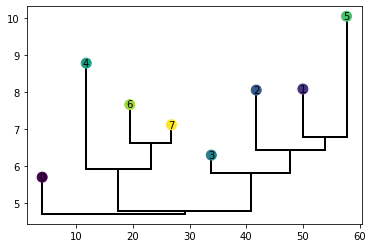

In [7]:
est.get_histogram()

Running again with a different Z without the need of recomputing the neighbors-densities

In [8]:
params = est.get_computed_params()
est.set_params(**params)
est.set_params(Z=1)
start=time.time()
est.fit(data_F1)
end=time.time()
print(end-start)

1.762514591217041


The PAk and twoNN estimator can be used indipendently from the DPA clustering method.

In [9]:
from Pipeline import PAk
from Pipeline import twoNN

rho_est = PAk.PointAdaptive_kNN()
d_est = twoNN.twoNearestNeighbors()


In [10]:
results = rho_est.fit(data_F1)
print(results.densities_[:10])

dim = d_est.fit(data_F1).dim_
print(dim)

[9.285334535207799, 4.7897850475688095, 3.7807573464963666, 7.0284003030244255, 7.262019484062379, 9.739026577157622, 9.646677593518241, 7.471269391580993, 9.580323288393377, 7.74468781783699]
2
